# Setup Environment

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd /content/drive/My Drive/Thesis/Final/GPAR/SOURCE

/content/drive/.shortcut-targets-by-id/18_zdtnvoSmQEMVajU7EcjpS9fg_Cr2bC/Thesis/Final/GPAR/SOURCE


In [3]:
! pip install import-ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=755b9bb4941684e0843666060c406731440c0909cbd7ae66f9eb6c90b8ade8f6
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [1]:
import import_ipynb as ipy

In [2]:
import Thesis_Undirected_GPARs_Final as undirected
import Thesis_Directed_GPARs_Final as directed

importing Jupyter notebook from Thesis_Undirected_GPARs_Final.ipynb
importing Jupyter notebook from Thesis_Directed_GPARs_Final.ipynb


# Main Process

In [3]:
def FPMiner(profiles_data, relationships_data, minsup, directed_=True):
  MODIFY_INDEX = 0
  if directed_ == True:
    g = directed.MyGraph()
  else:
    g = undirected.MyGraph()
  print('Data Loading ...')
  g.loadData(profiles_data, relationships_data)
  print('Mining Frequent patterns ....')
  fp = g.FPMiner(minsup)
  return fp

def ruleGen(fp, conf=0.9):
  print('Generating association rules ...')
  rules, confs = fp.ruleGen(conf)
  return rules, confs

# Test

In [4]:
g = undirected.MyGraph()
g.loadData('DATASETS/CL_10K_1d8_L5/CL_10K_1d8_L5_profiles.txt', 'DATASETS/CL_10K_1d8_L5/CL_10K_1d8_L5_relationships.txt')

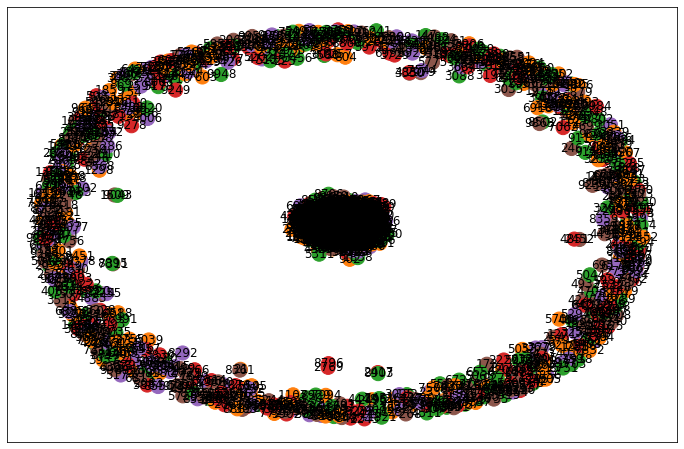

In [5]:
g.plot()

In [8]:
dts = 'CL_10K_1d8_L5'
dir = 'DATASETS/' + dts + '/' + dts
import time
start = time.time()
fc = FPMiner(dir + '_profiles.txt', dir + '_relationships.txt', 410, True)
print ('Time: ', time.time() - start)
print(fc.getNum())
fc.display()

Data Loading ...
Mining Frequent patterns ....
Time:  56.283482789993286
87
None : 0
[0 1 (2, -1, 1)] : 731
[0 1 (2, -1, 1), 0 2 (2, -1, 4)] : 424
[0 1 (2, -1, 1), 2 0 (4, -1, 2)] : 411
[0 1 (1, -1, 1)] : 751
[0 1 (1, -1, 1), 2 0 (2, -1, 1)] : 420
[0 1 (1, -1, 1), 2 0 (3, -1, 1)] : 434
[0 1 (1, -1, 1), 0 2 (1, -1, 5)] : 432
[0 1 (1, -1, 1), 0 2 (1, -1, 3)] : 432
[0 1 (1, -1, 1), 2 1 (4, -1, 1)] : 415
[0 1 (1, -1, 1), 1 2 (1, -1, 5)] : 432
[0 1 (1, -1, 1), 2 1 (5, -1, 1)] : 422
[0 1 (1, -1, 1), 0 2 (1, -1, 4)] : 415
[0 1 (1, -1, 1), 2 0 (4, -1, 1)] : 429
[0 1 (1, -1, 1), 2 1 (2, -1, 1)] : 418
[0 1 (1, -1, 1), 1 2 (1, -1, 1)] : 437
[0 1 (1, -1, 1), 1 2 (1, -1, 4)] : 414
[0 1 (1, -1, 2)] : 688
[0 1 (1, -1, 2), 1 2 (2, -1, 1)] : 410
[0 1 (4, -1, 3)] : 716
[0 1 (4, -1, 3), 2 1 (5, -1, 3)] : 411
[0 1 (3, -1, 4)] : 709
[0 1 (3, -1, 4), 2 0 (4, -1, 3)] : 422
[0 1 (3, -1, 4), 1 2 (4, -1, 4)] : 415
[0 1 (3, -1, 4), 0 2 (3, -1, 5)] : 431
[0 1 (3, -1, 5)] : 741
[0 1 (3, -1, 5), 2 0 (4, -1, 3)] : 4

In [ ]:
rules, confs = fc.ruleGen(0.6)
print(len(rules), rules, confs)

12 [([0 1 (1, -1, 3)], [0 2 (1, -1, 1)]), ([0 1 (3, -1, 4)], [0 2 (3, -1, 5)]), ([0 1 (3, -1, 2)], [0 2 (3, -1, 1)]), ([0 1 (3, -1, 3)], [1 2 (3, -1, 1)]), ([0 1 (3, -1, 2)], [0 2 (3, -1, 5)]), ([0 1 (3, -1, 1)], [2 0 (1, -1, 3)]), ([0 1 (1, -1, 3)], [1 2 (3, -1, 1)]), ([0 1 (4, -1, 3)], [2 1 (1, -1, 3)]), ([0 1 (3, -1, 5)], [2 0 (1, -1, 3)]), ([0 1 (1, -1, 3)], [1 2 (3, -1, 5)]), ([0 1 (3, -1, 2)], [2 0 (1, -1, 3)]), ([0 1 (1, -1, 3)], [1 2 (3, -1, 2)])] [0.6008344923504868, 0.607898448519041, 0.6138032305433186, 0.6036161335187761, 0.6240822320117474, 0.610512129380054, 0.6300417246175244, 0.6019553072625698, 0.6059379217273954, 0.6244784422809457, 0.6461086637298091, 0.6119610570236439]


In [10]:
ls DATASETS/NewTest1/

newTest1_profiles.txt  newTest1_relationships.txt


In [8]:
dts = 'newTest1'
dir = 'DATASETS/' + dts + '/' + dts
fc = FPMiner(dir+'_profiles.txt', dir+'_relationships.txt', 250, True)
print(fc.getNum())
fc.display()

Data Loading ...
Mining Frequent patterns ....
13
None : 0
[0 1 (1, -1, 2)] : 285
[0 1 (1, -1, 2), 1 2 (2, -1, 4)] : 278
[0 1 (1, -1, 2), 1 2 (2, -1, 3)] : 285
[0 1 (1, -1, 2), 1 2 (2, -1, 3), 1 3 (2, -1, 4)] : 278
[0 1 (2, -1, 4)] : 278
[0 1 (0, -1, 1)] : 286
[0 1 (0, -1, 1), 1 2 (1, -1, 2)] : 285
[0 1 (0, -1, 1), 1 2 (1, -1, 2), 2 3 (2, -1, 4)] : 278
[0 1 (0, -1, 1), 1 2 (1, -1, 2), 2 3 (2, -1, 3)] : 285
[0 1 (0, -1, 1), 1 2 (1, -1, 2), 2 3 (2, -1, 3), 2 4 (2, -1, 4)] : 278
[0 1 (2, -1, 3)] : 290
[0 1 (2, -1, 3), 0 2 (2, -1, 4)] : 278
